<a href="https://colab.research.google.com/github/Nwanekwup/Sentiment_Analysis_Project/blob/main/Sentiment_Analysis_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import matplotlib.pyplot as plt
import re

In [3]:
# define file path and load dataset
file_path = "/content/drive/My Drive/Sentiment Analysis Project/tweets.csv"
data = pd.read_csv(file_path, header=0)

data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [4]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression


In [6]:
# Data preprocessing phase
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [7]:

def preprocess_text(text):
  # ensure text is a string
  text = str(text)

  # clean text using regular expression

  text = re.sub(r'https?://\S+|www.\.\S+', '', text) #remove URLs
  text = re.sub(r'@\w+', '', text) # Remove user mentions
  text = re.sub(r'#', '', text) # Remove hashtag symbol
  text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
  text = text.lower() # Convert to lowercase

  # Tokenize
  tokens = word_tokenize(text)

  #Lemmatize and remove stop words
  processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  return ' '.join(processed_tokens)



In [8]:
# Apply the preprocessing function to the 'tweet' column
data['processed_tweet'] = data['tweet'].apply(preprocess_text)
print("\nPreprocessing complete. Here's a sample of the original vs. processet tweets:")
print(data[['tweet', 'processed_tweet']].head())


Preprocessing complete. Here's a sample of the original vs. processet tweets:
                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                   processed

Feature engineering: Split preprocessed data into training and testing sets and then convert the text into two numerical features using Bag-of-Words model

In [9]:
# Define features (X) and Target (y) using column names
X = data['processed_tweet']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Execute Feature Engineering with CountVectorizer
# This creates the document-term matrix
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


print(f"Shape of training data features: {X_train_vec.shape}")


Shape of training data features: (6336, 14401)


Train Baseline Model: train baseline Logistic Regression classifier on the numerical features created

In [10]:
# Initialize and train the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Use the trained model to make predictions on the test data features
y_pred = model.predict(X_test_vec)

# Print the first 20 predictions to see the raw output
print("First 20 predictions from the model:", y_pred[:20])

# Calculate the key performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Print the full classification report for a more detailed breakdown
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))




First 20 predictions from the model: [0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]
Accuracy: 0.8908
Precision: 0.8346
Recall: 0.7477

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1152
           1       0.83      0.75      0.79       432

    accuracy                           0.89      1584
   macro avg       0.87      0.85      0.86      1584
weighted avg       0.89      0.89      0.89      1584



In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

print("--- Model Comparison Experiment ---")

# Using the best vectorizer setting found previously: CountVectorizer with Bigrams
# This ensures a fair comparison across all models
vectorizer_settings = CountVectorizer(ngram_range=(1, 2))

# Define the dictionary of models to be compared
models_to_test = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=1.0),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(dual=False, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

print(f"Comparing {len(models_to_test)} models using Bigram features...\n")

results = {}

for name, model in models_to_test.items():
    # Create a mini-pipeline for this specific model
    temp_pipeline = Pipeline([
        ('vectorizer', vectorizer_settings),
        ('classifier', model)
    ])

    # Train
    print(f"Training {name}...")
    temp_pipeline.fit(X_train, y_train)

    # Predict
    pred = temp_pipeline.predict(X_test)

    # Score
    acc = accuracy_score(y_test, pred)
    results[name] = acc
    print(f"--> {name} Accuracy: {acc:.4f}")

# Finding the best model
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with {results[best_model_name]:.4f} accuracy.")

--- Model Comparison Experiment ---
Comparing 4 models using Bigram features...

Training Logistic Regression...
--> Logistic Regression Accuracy: 0.8895
Training Multinomial Naive Bayes...
--> Multinomial Naive Bayes Accuracy: 0.8902
Training Linear SVM...
--> Linear SVM Accuracy: 0.8750
Training Random Forest...
--> Random Forest Accuracy: 0.8491

Best Model: Multinomial Naive Bayes with 0.8902 accuracy.


Refining strategy with TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#initialize the new TF_IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# fit and transform the training data. This teaches the vectorizer the vocabulary and creates the feature matrix
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data only. uses the already-learned vocabulary to create the feature matrix for the test set
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Shape of training data features: {X_train_tfidf.shape}")


Shape of training data features: (6336, 14401)


In [12]:
# Initialize a new Logistic Regression model
tfidf_model = LogisticRegression(max_iter=1000)

# Train model on new TF-IDF features
tfidf_model.fit(X_train_tfidf, y_train)

# make predictions on the new TF-IDF test features
y_pred_tfidf = tfidf_model.predict(X_test_tfidf)

# Evaluate the perforance of the refined model
print("--- Classification Report (TF-IDF) ---")
print(classification_report(y_test, y_pred_tfidf))


--- Classification Report (TF-IDF) ---
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1152
           1       0.86      0.64      0.73       432

    accuracy                           0.87      1584
   macro avg       0.87      0.80      0.83      1584
weighted avg       0.87      0.87      0.87      1584



In [13]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# 1. Define steps for the pipeline

pipeline_steps = [
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression(max_iter=1000))
]

# 2. Create the pipeline object
model_pipeline = Pipeline(pipeline_steps)


In [14]:
# 1. Train the entire pipeline on the original text data
#    The pipeline will handle the .fit_transform() and .fit() calls internally
print("Training the full model pipeline...")
model_pipeline.fit(X_train, y_train)

# 2. Make predictions on the test set (using raw text)
y_pred_pipeline = model_pipeline.predict(X_test)

# 3. Validate the pipeline's performance
print("\n--- Pipeline Validation Report ---")
print(classification_report(y_test, y_pred_pipeline))

Training the full model pipeline...

--- Pipeline Validation Report ---
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1152
           1       0.83      0.75      0.79       432

    accuracy                           0.89      1584
   macro avg       0.87      0.85      0.86      1584
weighted avg       0.89      0.89      0.89      1584



In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

print("\n--- Model Optimization with GridSearchCV (MNB) ---")

# Define the pipeline with the best classifier (Multinomial Naive Bayes)
pipeline_mnb = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Define the parameter grid to search over
param_grid_mnb = {
    # Test both CountVectorizer AND TfidfVectorizer
    'vectorizer': [CountVectorizer(), TfidfVectorizer()],

    # Test Unigrams (single words) vs Bigrams (two-word phrases)
    'vectorizer__ngram_range': [(1, 1), (1, 2)],

    # Test different smoothing values for Naive Bayes (like 'C' in Logistic Regression)
    'classifier__alpha': [0.1, 0.5, 1.0, 2.0]
}

# Initialize Grid Search
grid_search_mnb = GridSearchCV(
    pipeline_mnb,
    param_grid_mnb,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

print("Running Grid Search on Multinomial Naive Bayes...")
grid_search_mnb.fit(X_train, y_train)

print("\nBest Hyperparameters Found (MNB):")
print(grid_search_mnb.best_params_)

# Final Evaluation with the Winner
best_model_mnb = grid_search_mnb.best_estimator_
y_pred_optimized = best_model_mnb.predict(X_test)

print("\nFinal Classification Report (Optimized MNB):")
print(classification_report(y_test, y_pred_optimized))


--- Model Optimization with GridSearchCV (MNB) ---
Running Grid Search on Multinomial Naive Bayes...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Hyperparameters Found (MNB):
{'classifier__alpha': 1.0, 'vectorizer': CountVectorizer(), 'vectorizer__ngram_range': (1, 2)}

Final Classification Report (Optimized MNB):
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1152
           1       0.81      0.78      0.79       432

    accuracy                           0.89      1584
   macro avg       0.86      0.86      0.86      1584
weighted avg       0.89      0.89      0.89      1584



In [30]:
print("\n--- Sentiment Test ---")

def predict_sentiment(text):

    clean_text = preprocess_text(text)
    prediction = best_model_mnb.predict([clean_text])[0]

    if prediction == 0:
        return "😊 POSITIVE"
    else:
        return "😠 NEGATIVE"

# Simple loop to test multiple sentences
sentences = [
    "I absolutely love this phone, it is amazing!",
    "Worst waste of money ever, do not buy.",
    "It's okay, not great but not terrible.",
    "The delivery was late but the product is good.",
    "This is not good",
    "i like it"
]

for s in sentences:
    result = predict_sentiment(s)
    print(f"Text: '{s}' \n -> Result: {result}\n")


--- Sentiment Test ---
Text: 'I absolutely love this phone, it is amazing!' 
 -> Result: 😊 POSITIVE

Text: 'Worst waste of money ever, do not buy.' 
 -> Result: 😠 NEGATIVE

Text: 'It's okay, not great but not terrible.' 
 -> Result: 😠 NEGATIVE

Text: 'The delivery was late but the product is good.' 
 -> Result: 😊 POSITIVE

Text: 'This is not good' 
 -> Result: 😊 POSITIVE

Text: 'i like it' 
 -> Result: 😊 POSITIVE




--- Final Evaluation ---

FINAL OPTIMIZED MODEL CLASSIFICATION REPORT:
Final Optimized Accuracy: 0.8895
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1152
           1       0.85      0.73      0.78       432

    accuracy                           0.89      1584
   macro avg       0.87      0.84      0.85      1584
weighted avg       0.89      0.89      0.89      1584



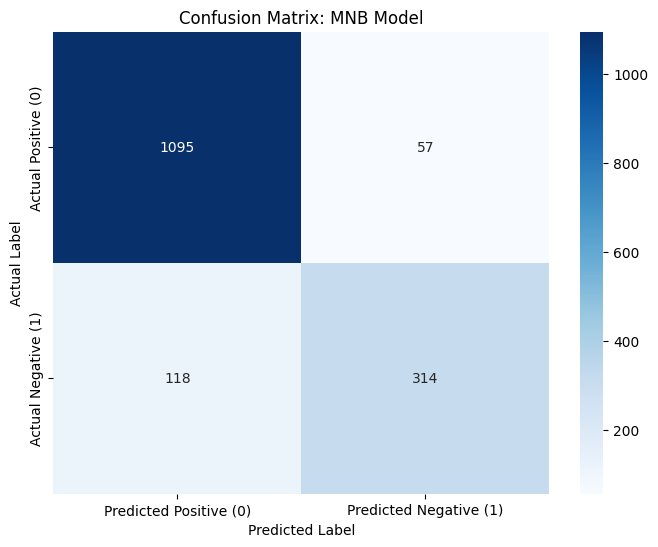

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\n--- Final Evaluation ---")

# 1. Make predictions using the final, optimized model
y_pred_optimized = best_model.predict(X_test)

# 2. Generate the Final Classification Report
print("\nFINAL OPTIMIZED MODEL CLASSIFICATION REPORT:")
final_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Final Optimized Accuracy: {final_accuracy:.4f}")
print(classification_report(y_test, y_pred_optimized))

# 3. Create a Professional Confusion Matrix Heatmap
#    This looks much better for reports and presentations than a text printout.
conf_matrix = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Positive (0)', 'Predicted Negative (1)'],
            yticklabels=['Actual Positive (0)', 'Actual Negative (1)'])

plt.title('Confusion Matrix: MNB Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()